# Become a Data Analyst in Italy

In this project, we will see how and why to become a data analyst in Italy. Coming from academia, it may seems very difficult to find a job in a company as data analyst. However, it can be worth persevering in the moving. Don't believe me? Just look below! 

## To start

A big thank you to Luke Barousse for the data. He made data public available and easy to import.
You can install libreries you are missing by typing from the terminal window: \
`conda install datasets pandas matplotlib adjustText`

## How many job postings and where

*Methodology*

1. Get data
2. Explore dataframe
3. Filter for `job_country` 
4. Cleaning data
5. Count based on `job_location`

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from datasets import load_dataset 
import matplotlib.pyplot as plt
import ast
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [2]:
# visualize first 5 rows
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [3]:
# get a summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

### Filter Data and Remove Duplicates

Filter the data for the italian market and/or for the data analyst position. Remove reposted jobs for the same position from the same company.

In [4]:
df_it = df[df['job_country']=='Italy'].drop_duplicates(subset=["job_title","company_name"]).copy()
df_DA = df[df['job_title_short']=='Data Analyst'].drop_duplicates(subset=["job_title","company_name"]).copy()
df_DA_it = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='Italy')].drop_duplicates(subset=["job_title","company_name"]).copy()

### Count Job Postings per Location

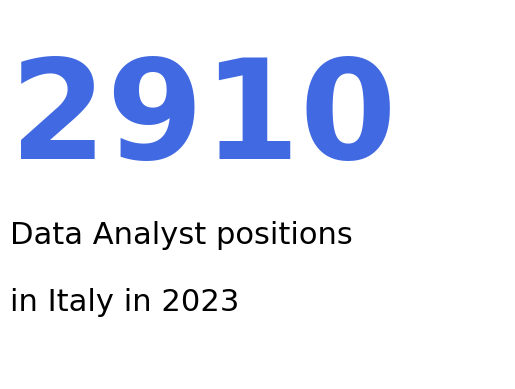

In [5]:
n_post = len(df_DA_it)
fig = plt.figure()
ax = fig.add_subplot(111)

ax.text(0, 0.7, f'{n_post}',
    horizontalalignment='left',
    verticalalignment='center',
    color='royalblue',
    fontsize=100, weight='bold', clip_on=True)

ax.text(0, 0.3, 'Data Analyst positions\n\nin Italy in 2023',
    horizontalalignment='left',
    verticalalignment='center',
    fontsize=22, clip_on=True)



plt.axis('off')
plt.show()

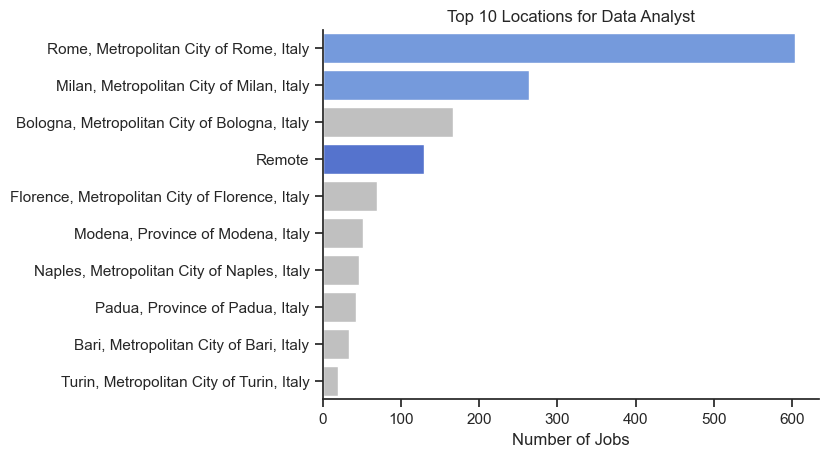

In [6]:
# Cleaning data
df_DA_it.loc[:, 'job_location'] = df_DA_it['job_location'].apply(lambda x: x.replace(' Capital','') if 'Capital' in x else x)
df_DA_it.loc[:, 'job_location'] = df_DA_it['job_location'].apply(lambda x: x.replace('Anywhere','Remote') if x == 'Anywhere' else x)

# Remove unspecified location
df_site = df_DA_it[df_DA_it['job_location']!='Italy']
df_site = df_site['job_location'].value_counts().head(10).to_frame()

# Highlight locations with 200+ jobs or remote 
cols = ['']*len(df_site.index)
for i,city in enumerate(df_site.index):
    if city == 'Remote':
        cols[i] = 'royalblue'
    elif df_site.loc[city,'count']>200:
        cols[i] = 'cornflowerblue'
    else:
        cols[i] = 'silver'

sns.set_theme(style='ticks')
sns.barplot(data=df_site, x='count',y='job_location',hue='job_location',palette=cols,legend=False)
sns.despine()
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.title('Top 10 Locations for Data Analyst')
plt.show()

## Salary Distribution by Job Title

Filter our data to only include salary values from Italy. Remove missing values about salary.

In [7]:
# Remove missing values
df_it_no_na = df_it.dropna(subset='salary_year_avg')

Crate a list of top 3 jobs.

In [ ]:
top_jobs = 3
df_it_no_na['job_title_short'].value_counts()
job_titles = df_it_no_na['job_title_short'].value_counts().sort_values(ascending=False).index[:top_jobs].tolist()
job_titles

Filter

In [ ]:
df_it_top = df_it_no_na[df_it_no_na['job_title_short'].isin(job_titles)]

Create a list for ordering `job_title_short` in the next plot.

In [10]:
# Order by median salary
job_order = df_it_top.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

## Plot Salary Distributions
Plot the top 3 job titles salary distributions using a box plot.

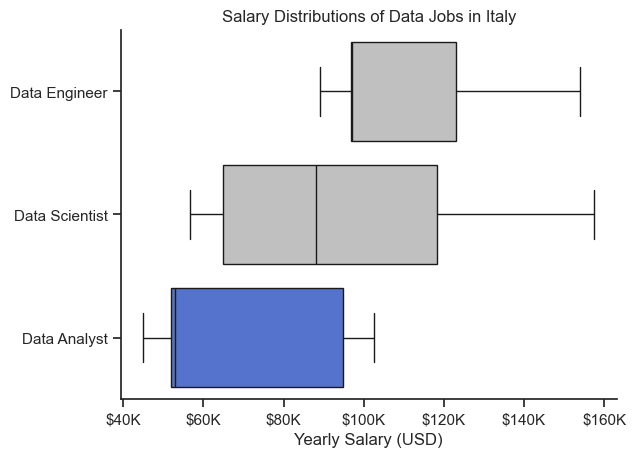

In [11]:
# Plotting
cols=['silver','silver','royalblue']
sns.boxplot(data=df_it_top,x='salary_year_avg',y='job_title_short',hue='job_title_short',order=job_order, palette=cols, linecolor='k')
ax=plt.gca()
# Format x axis labels
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))
plt.title('Salary Distributions of Data Jobs in Italy')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
sns.despine()
plt.show()

### Considering just the job postings where salary information is available

Now look at the most requested or the highest paid skills among the job postings that gives a salary estimate.

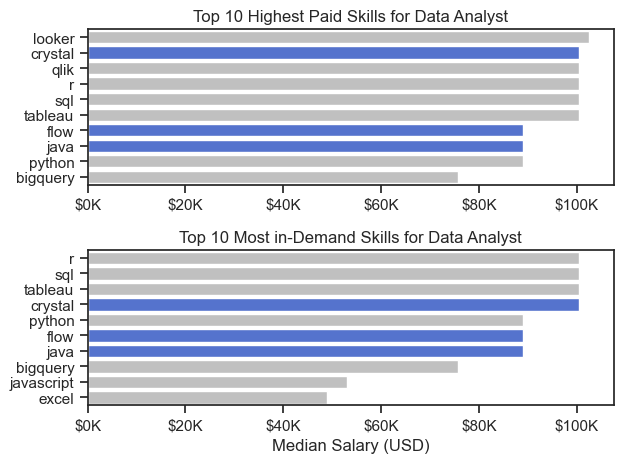

In [18]:
df_DA_it['job_skills'] = df_DA_it['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

# Remove rows with absent salary column
df_DA_it_no_na = df_DA_it.dropna(subset='salary_year_avg').copy()

# Explode the new dataframe 
df_DA_it_no_na = df_DA_it_no_na.explode('job_skills')

# Find the 10 skills with highest median salary
df_DA_top_pay = df_DA_it_no_na.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False)
df_DA_top_pay = df_DA_top_pay.head(10)

# Find the 10 most requested skills
df_DA_skills = df_DA_it_no_na.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_DA_skills = df_DA_skills.head(10)
df_DA_skills = df_DA_skills.sort_values(by='median',ascending=False)

my_skills=['excel','python','sql','r','tableau']

# Highlight the most requested missing skills which are paid more than my skills
not_myskill_condition = ~df_DA_skills.index.isin(my_skills)
my_skills_salary = df_DA_skills.loc[df_DA_skills.index.isin(my_skills),'median'].mean()
higher_sal_condition = df_DA_skills['median']>my_skills_salary
highlight_skills = df_DA_skills.loc[higher_sal_condition & not_myskill_condition].index.to_list()

# Plot results

fig, ax = plt.subplots(2,1)
sns.set_theme(style='ticks')

# Finding index for skill to highlight in the top paid skills plot
cols = ['silver']*len(df_DA_top_pay)
highlight_indices = np.where(df_DA_top_pay.index.isin(highlight_skills))[0]
for idx in highlight_indices:
    cols[idx] = 'royalblue'

sns.barplot(data=df_DA_top_pay,x='median',y=df_DA_top_pay.index, ax=ax[0], hue=df_DA_top_pay.index,palette=cols,legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

# Finding index for skill to highlight in the most requested skills plot
cols = ['silver']*len(df_DA_skills)
highlight_indices = np.where(df_DA_skills.index.isin(highlight_skills))[0]
for idx in highlight_indices:
    cols[idx] = 'royalblue' 

sns.barplot(data=df_DA_skills,x='median',y=df_DA_skills.index, ax=ax[1],hue=df_DA_skills.index,palette=cols,legend=False)
ax[1].set_xlim(ax[0].get_xlim()) #put same xlim of the other ax
ax[1].set_title('Top 10 Most in-Demand Skills for Data Analyst')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))
fig.tight_layout()
plt.show()



### Most profitable skills per technology in data jobs

*Methodology*

1. Find percent of postings with skill
2. Visualize median salary vs percent skill demand
3. Determine if certain technologies are more prevalent


In [19]:
df_DA_skills = df_DA_it_no_na.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.rename(columns={'count':'skills_count','median':'median_salary'})
DA_job_count = len(df_DA_it_no_na)

df_DA_skills['skill_percent'] = df_DA_skills['skills_count']/DA_job_count *100
skill_percent = 2.5
df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent']>skill_percent]


In [20]:
# Filter just the skills you don't already know 
new_skills=[]
for s in df_DA_skills_high_demand.index:
    if s not in my_skills:
        new_skills.append(s)

df_DA_skills_high_demand = df_DA_skills_high_demand.loc[new_skills]

In [21]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict



{'analyst_tools': ['power bi',
  'esquisse',
  'ms access',
  'sap',
  'spss',
  'splunk',
  'powerpoint',
  'outlook',
  'sharepoint',
  'sas',
  'nuix',
  'ssrs',
  'spreadsheet',
  'tableau',
  'sheets',
  'visio',
  'cognos',
  'excel',
  'dax',
  'powerbi',
  'qlik',
  'alteryx',
  'looker',
  'word',
  'msaccess',
  'microstrategy',
  'datarobot',
  'ssis'],
 'programming': ['c#',
  'scala',
  'r',
  'mongodb',
  'html',
  'julia',
  'pascal',
  'objective-c',
  'matlab',
  'nosql',
  'mongo',
  'groovy',
  'cobol',
  'javascript',
  'ocaml',
  'powershell',
  'no-sql',
  'perl',
  'erlang',
  'clojure',
  'swift',
  'kotlin',
  'sas',
  'typescript',
  'bash',
  'solidity',
  'fortran',
  'f#',
  'shell',
  'c++',
  'lua',
  'vb.net',
  'vba',
  'apl',
  't-sql',
  'dart',
  'sass',
  'sql',
  'haskell',
  'java',
  'visual basic',
  'assembly',
  'crystal',
  'ruby',
  'golang',
  'css',
  'php',
  'elixir',
  'delphi',
  'visualbasic',
  'lisp',
  'c',
  'go',
  'python',
  'r

In [22]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_plot = df_DA_skills_high_demand.merge(df_technology,left_on='job_skills',right_on='skills')

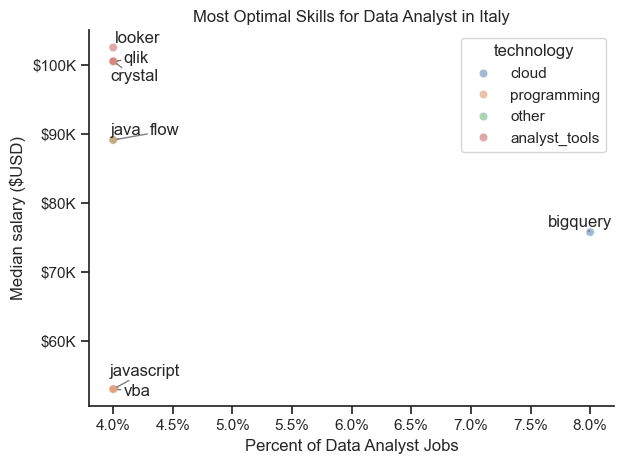

In [23]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

#df_plot.plot(kind='scatter',x='skill_percent',y='median_salary')
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology', 
    alpha=0.5
    )

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f"${int(y/1000)}K"))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=1))

plt.ylabel('Median salary ($USD)')
plt.xlabel('Percent of Data Analyst Jobs')
plt.title('Most Optimal Skills for Data Analyst in Italy')
texts = []
for i,txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i],df_DA_skills_high_demand['median_salary'].iloc[i],txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray',lw=1))
plt.tight_layout()
sns.despine()
sns.set_theme(style='ticks')
plt.show()